In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
import torch

In [3]:
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [2]:
adata = sc.read('annotated.h5ad')

In [4]:
df = pd.read_csv('DEG_Stromal_3_tumor_vs_normal.csv')
df

,Unnamed: 0,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
0,MTRNR2L12,1.0000,0.0000,18.420681,5.299854e-06,0.012101,1.000000e-07,0.5,-11.364323,-11.350452,...,0.000000,3.000255,0.000000,1.000000,0.000000,25.811900,True,Tumor vs Normal,Tumor,Normal
1,MTRNR2L8,1.0000,0.0000,18.420681,2.637947e-06,0.003435,1.000000e-07,0.5,-8.124601,-7.491157,...,0.000000,0.879998,0.000000,0.500000,0.000000,8.070394,True,Tumor vs Normal,Tumor,Normal
2,HLA-DRB5,0.9998,0.0002,8.516943,4.648222e-07,0.000077,1.000000e-07,0.5,-8.089521,-8.448482,...,0.000000,0.062422,0.000000,0.142857,0.000000,0.499214,True,Tumor vs Normal,Tumor,Normal
3,AC007952.4,1.0000,0.0000,18.420681,1.870111e-07,0.000052,1.000000e-07,0.5,-8.063536,-8.068035,...,0.000000,0.031305,0.000000,0.071429,0.000000,0.247966,True,Tumor vs Normal,Tumor,Normal
4,GSTM1,1.0000,0.0000,18.420681,3.041486e-07,0.000119,1.000000e-07,0.5,-8.035534,-8.465895,...,0.000000,0.327402,0.000000,0.452381,0.000000,2.680276,True,Tumor vs Normal,Tumor,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,SSRP1,0.9398,0.0602,2.747995,4.552933e-05,0.000091,1.000000e-07,0.5,-0.997533,-0.990461,...,0.112852,0.074302,0.304348,0.142857,0.948082,0.602104,True,Tumor vs Normal,Tumor,Normal
1501,PI4K2B,0.9062,0.0938,2.268095,1.340175e-05,0.000005,1.000000e-07,0.5,0.948173,1.368293,...,0.007793,0.000000,0.043478,0.000000,0.055219,0.000000,True,Tumor vs Normal,Tumor,Normal
1502,SNRPA,0.9186,0.0814,2.423475,4.665330e-05,0.000090,1.000000e-07,0.5,-0.944361,-0.920015,...,0.023150,0.196715,0.130435,0.357143,0.161921,1.643880,True,Tumor vs Normal,Tumor,Normal
1503,EPN1,0.8972,0.1028,2.166493,3.691036e-05,0.000070,1.000000e-07,0.5,-0.906216,-0.901048,...,0.046999,0.090852,0.173913,0.214286,0.334322,0.771623,True,Tumor vs Normal,Tumor,Normal


In [5]:
df.set_index('Unnamed: 0', inplace=True)
df

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
MTRNR2L12,1.0000,0.0000,18.420681,5.299854e-06,0.012101,1.000000e-07,0.5,-11.364323,-11.350452,1.346011,...,0.000000,3.000255,0.000000,1.000000,0.000000,25.811900,True,Tumor vs Normal,Tumor,Normal
MTRNR2L8,1.0000,0.0000,18.420681,2.637947e-06,0.003435,1.000000e-07,0.5,-8.124601,-7.491157,2.597971,...,0.000000,0.879998,0.000000,0.500000,0.000000,8.070394,True,Tumor vs Normal,Tumor,Normal
HLA-DRB5,0.9998,0.0002,8.516943,4.648222e-07,0.000077,1.000000e-07,0.5,-8.089521,-8.448482,2.416597,...,0.000000,0.062422,0.000000,0.142857,0.000000,0.499214,True,Tumor vs Normal,Tumor,Normal
AC007952.4,1.0000,0.0000,18.420681,1.870111e-07,0.000052,1.000000e-07,0.5,-8.063536,-8.068035,1.274780,...,0.000000,0.031305,0.000000,0.071429,0.000000,0.247966,True,Tumor vs Normal,Tumor,Normal
GSTM1,1.0000,0.0000,18.420681,3.041486e-07,0.000119,1.000000e-07,0.5,-8.035534,-8.465895,1.773312,...,0.000000,0.327402,0.000000,0.452381,0.000000,2.680276,True,Tumor vs Normal,Tumor,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SSRP1,0.9398,0.0602,2.747995,4.552933e-05,0.000091,1.000000e-07,0.5,-0.997533,-0.990461,0.329946,...,0.112852,0.074302,0.304348,0.142857,0.948082,0.602104,True,Tumor vs Normal,Tumor,Normal
PI4K2B,0.9062,0.0938,2.268095,1.340175e-05,0.000005,1.000000e-07,0.5,0.948173,1.368293,1.761983,...,0.007793,0.000000,0.043478,0.000000,0.055219,0.000000,True,Tumor vs Normal,Tumor,Normal
SNRPA,0.9186,0.0814,2.423475,4.665330e-05,0.000090,1.000000e-07,0.5,-0.944361,-0.920015,0.343517,...,0.023150,0.196715,0.130435,0.357143,0.161921,1.643880,True,Tumor vs Normal,Tumor,Normal


In [6]:
df.index.name = None

In [7]:
df

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
MTRNR2L12,1.0000,0.0000,18.420681,5.299854e-06,0.012101,1.000000e-07,0.5,-11.364323,-11.350452,1.346011,...,0.000000,3.000255,0.000000,1.000000,0.000000,25.811900,True,Tumor vs Normal,Tumor,Normal
MTRNR2L8,1.0000,0.0000,18.420681,2.637947e-06,0.003435,1.000000e-07,0.5,-8.124601,-7.491157,2.597971,...,0.000000,0.879998,0.000000,0.500000,0.000000,8.070394,True,Tumor vs Normal,Tumor,Normal
HLA-DRB5,0.9998,0.0002,8.516943,4.648222e-07,0.000077,1.000000e-07,0.5,-8.089521,-8.448482,2.416597,...,0.000000,0.062422,0.000000,0.142857,0.000000,0.499214,True,Tumor vs Normal,Tumor,Normal
AC007952.4,1.0000,0.0000,18.420681,1.870111e-07,0.000052,1.000000e-07,0.5,-8.063536,-8.068035,1.274780,...,0.000000,0.031305,0.000000,0.071429,0.000000,0.247966,True,Tumor vs Normal,Tumor,Normal
GSTM1,1.0000,0.0000,18.420681,3.041486e-07,0.000119,1.000000e-07,0.5,-8.035534,-8.465895,1.773312,...,0.000000,0.327402,0.000000,0.452381,0.000000,2.680276,True,Tumor vs Normal,Tumor,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SSRP1,0.9398,0.0602,2.747995,4.552933e-05,0.000091,1.000000e-07,0.5,-0.997533,-0.990461,0.329946,...,0.112852,0.074302,0.304348,0.142857,0.948082,0.602104,True,Tumor vs Normal,Tumor,Normal
PI4K2B,0.9062,0.0938,2.268095,1.340175e-05,0.000005,1.000000e-07,0.5,0.948173,1.368293,1.761983,...,0.007793,0.000000,0.043478,0.000000,0.055219,0.000000,True,Tumor vs Normal,Tumor,Normal
SNRPA,0.9186,0.0814,2.423475,4.665330e-05,0.000090,1.000000e-07,0.5,-0.944361,-0.920015,0.343517,...,0.023150,0.196715,0.130435,0.357143,0.161921,1.643880,True,Tumor vs Normal,Tumor,Normal
EPN1,0.8972,0.1028,2.166493,3.691036e-05,0.000070,1.000000e-07,0.5,-0.906216,-0.901048,0.324914,...,0.046999,0.090852,0.173913,0.214286,0.334322,0.771623,True,Tumor vs Normal,Tumor,Normal


In [8]:
df= df.sort_values('lfc_mean')
df

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
MTRNR2L12,1.0000,0.0000,18.420681,5.299854e-06,1.210067e-02,1.000000e-07,0.5,-11.364323,-11.350452,1.346011,...,0.000000,3.000255,0.000000,1.000000,0.000000,25.811900,True,Tumor vs Normal,Tumor,Normal
MTRNR2L8,1.0000,0.0000,18.420681,2.637947e-06,3.434756e-03,1.000000e-07,0.5,-8.124601,-7.491157,2.597971,...,0.000000,0.879998,0.000000,0.500000,0.000000,8.070394,True,Tumor vs Normal,Tumor,Normal
HLA-DRB5,0.9998,0.0002,8.516943,4.648222e-07,7.703366e-05,1.000000e-07,0.5,-8.089521,-8.448482,2.416597,...,0.000000,0.062422,0.000000,0.142857,0.000000,0.499214,True,Tumor vs Normal,Tumor,Normal
AC007952.4,1.0000,0.0000,18.420681,1.870111e-07,5.190486e-05,1.000000e-07,0.5,-8.063536,-8.068035,1.274780,...,0.000000,0.031305,0.000000,0.071429,0.000000,0.247966,True,Tumor vs Normal,Tumor,Normal
GSTM1,1.0000,0.0000,18.420681,3.041486e-07,1.185255e-04,1.000000e-07,0.5,-8.035534,-8.465895,1.773312,...,0.000000,0.327402,0.000000,0.452381,0.000000,2.680276,True,Tumor vs Normal,Tumor,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPA4,0.9538,0.0462,3.027474,5.814115e-06,2.184362e-07,1.000000e-07,0.5,4.397318,4.518910,2.206691,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,Tumor vs Normal,Tumor,Normal
PDE4C,0.9762,0.0238,3.713981,6.991746e-06,2.997213e-07,1.000000e-07,0.5,4.480905,4.608254,2.015412,...,0.015466,0.000000,0.086957,0.000000,0.113008,0.000000,True,Tumor vs Normal,Tumor,Normal
ABCF2,1.0000,0.0000,18.420681,2.226254e-05,1.221000e-06,1.000000e-07,0.5,4.512833,4.655326,1.083021,...,0.015129,0.000000,0.086957,0.000000,0.104258,0.000000,True,Tumor vs Normal,Tumor,Normal
PRR4,1.0000,0.0000,18.420681,1.335265e-05,6.006803e-07,1.000000e-07,0.5,4.702048,4.704685,1.267667,...,0.029052,0.000000,0.086957,0.000000,0.205374,0.000000,True,Tumor vs Normal,Tumor,Normal


In [11]:
df1= df.copy()
df1 = df1[(df1.raw_normalized_mean1 > .5) | (df1.raw_normalized_mean2 > .5)]
df1

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
MTRNR2L12,1.0000,0.0000,18.420681,5.299854e-06,0.012101,1.000000e-07,0.5,-11.364323,-11.350452,1.346011,...,0.000000,3.000255,0.000000,1.000000,0.000000,25.811900,True,Tumor vs Normal,Tumor,Normal
MTRNR2L8,1.0000,0.0000,18.420681,2.637947e-06,0.003435,1.000000e-07,0.5,-8.124601,-7.491157,2.597971,...,0.000000,0.879998,0.000000,0.500000,0.000000,8.070394,True,Tumor vs Normal,Tumor,Normal
GSTM1,1.0000,0.0000,18.420681,3.041486e-07,0.000119,1.000000e-07,0.5,-8.035534,-8.465895,1.773312,...,0.000000,0.327402,0.000000,0.452381,0.000000,2.680276,True,Tumor vs Normal,Tumor,Normal
OVCA2,1.0000,0.0000,18.420681,1.281383e-07,0.000033,1.000000e-07,0.5,-7.957793,-7.974417,0.768085,...,0.000000,0.066750,0.000000,0.119048,0.000000,0.552124,True,Tumor vs Normal,Tumor,Normal
ATP6V0C,1.0000,0.0000,18.420681,1.272178e-06,0.000318,1.000000e-07,0.5,-7.929880,-7.957513,0.670207,...,0.000000,0.409076,0.000000,0.595238,0.000000,3.306655,True,Tumor vs Normal,Tumor,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U2AF1,1.0000,0.0000,18.420681,2.924432e-05,0.000003,1.000000e-07,0.5,3.609152,3.468144,1.154376,...,0.070571,0.000000,0.086957,0.000000,0.804596,0.000000,True,Tumor vs Normal,Tumor,Normal
PSMA2,0.9996,0.0004,7.823621,1.514064e-04,0.000014,1.000000e-07,0.5,3.813918,3.730322,1.381260,...,0.225912,0.024273,0.478261,0.047619,1.750837,0.189707,True,Tumor vs Normal,Tumor,Normal
GREM1,0.9892,0.0108,4.517349,3.112054e-04,0.000023,1.000000e-07,0.5,3.877470,3.849950,1.607569,...,1.078102,0.183441,0.478261,0.214286,8.185534,1.604508,True,Tumor vs Normal,Tumor,Normal
POLR2J3,1.0000,0.0000,18.420681,7.070919e-05,0.000005,1.000000e-07,0.5,4.055226,3.907043,1.196181,...,0.157708,0.000000,0.260870,0.000000,1.465346,0.000000,True,Tumor vs Normal,Tumor,Normal


In [18]:
df1 = df1[(df1['is_de_fdr_0.05']) & (abs(df1.lfc_mean) > .5)]
df1

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
MTRNR2L12,1.0000,0.0000,18.420681,5.299854e-06,0.012101,1.000000e-07,0.5,-11.364323,-11.350452,1.346011,...,0.000000,3.000255,0.000000,1.000000,0.000000,25.811900,True,Tumor vs Normal,Tumor,Normal
MTRNR2L8,1.0000,0.0000,18.420681,2.637947e-06,0.003435,1.000000e-07,0.5,-8.124601,-7.491157,2.597971,...,0.000000,0.879998,0.000000,0.500000,0.000000,8.070394,True,Tumor vs Normal,Tumor,Normal
GSTM1,1.0000,0.0000,18.420681,3.041486e-07,0.000119,1.000000e-07,0.5,-8.035534,-8.465895,1.773312,...,0.000000,0.327402,0.000000,0.452381,0.000000,2.680276,True,Tumor vs Normal,Tumor,Normal
OVCA2,1.0000,0.0000,18.420681,1.281383e-07,0.000033,1.000000e-07,0.5,-7.957793,-7.974417,0.768085,...,0.000000,0.066750,0.000000,0.119048,0.000000,0.552124,True,Tumor vs Normal,Tumor,Normal
ATP6V0C,1.0000,0.0000,18.420681,1.272178e-06,0.000318,1.000000e-07,0.5,-7.929880,-7.957513,0.670207,...,0.000000,0.409076,0.000000,0.595238,0.000000,3.306655,True,Tumor vs Normal,Tumor,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U2AF1,1.0000,0.0000,18.420681,2.924432e-05,0.000003,1.000000e-07,0.5,3.609152,3.468144,1.154376,...,0.070571,0.000000,0.086957,0.000000,0.804596,0.000000,True,Tumor vs Normal,Tumor,Normal
PSMA2,0.9996,0.0004,7.823621,1.514064e-04,0.000014,1.000000e-07,0.5,3.813918,3.730322,1.381260,...,0.225912,0.024273,0.478261,0.047619,1.750837,0.189707,True,Tumor vs Normal,Tumor,Normal
GREM1,0.9892,0.0108,4.517349,3.112054e-04,0.000023,1.000000e-07,0.5,3.877470,3.849950,1.607569,...,1.078102,0.183441,0.478261,0.214286,8.185534,1.604508,True,Tumor vs Normal,Tumor,Normal
POLR2J3,1.0000,0.0000,18.420681,7.070919e-05,0.000005,1.000000e-07,0.5,4.055226,3.907043,1.196181,...,0.157708,0.000000,0.260870,0.000000,1.465346,0.000000,True,Tumor vs Normal,Tumor,Normal


In [12]:
genes_to_show = df1[-25:].index.tolist() + df1[:25].index.tolist() #top 25 and bottom 25 from sorted df
genes_to_show

['BICC1',
 'TRPS1',
 'PTGDS',
 'ARHGEF10',
 'ARPC1A',
 'CCDC71L',
 'MN1',
 'MRPL12',
 'CCZ1',
 'HAS2',
 'IGKC',
 'KCNE4',
 'RPS17',
 'BNC2',
 'POSTN',
 'RGPD5',
 'NUAK1',
 'ZC3H11A',
 'IGLC2',
 'C11orf96',
 'U2AF1',
 'PSMA2',
 'GREM1',
 'POLR2J3',
 'IGHA1',
 'MTRNR2L12',
 'MTRNR2L8',
 'GSTM1',
 'OVCA2',
 'ATP6V0C',
 'TNFSF13',
 'WBP1',
 'MT-ATP8',
 'FN3K',
 'PCDHGC3',
 'GSTM2',
 'MT-ND6',
 'BSCL2',
 'ZBTB16',
 'HMGN4',
 'AC016831.7',
 'MAN2B1',
 'MT-ND4L',
 'NME2',
 'GNG10',
 'WDR86',
 'HIST1H1E',
 'XIST',
 'NGRN',
 'DHRS4']

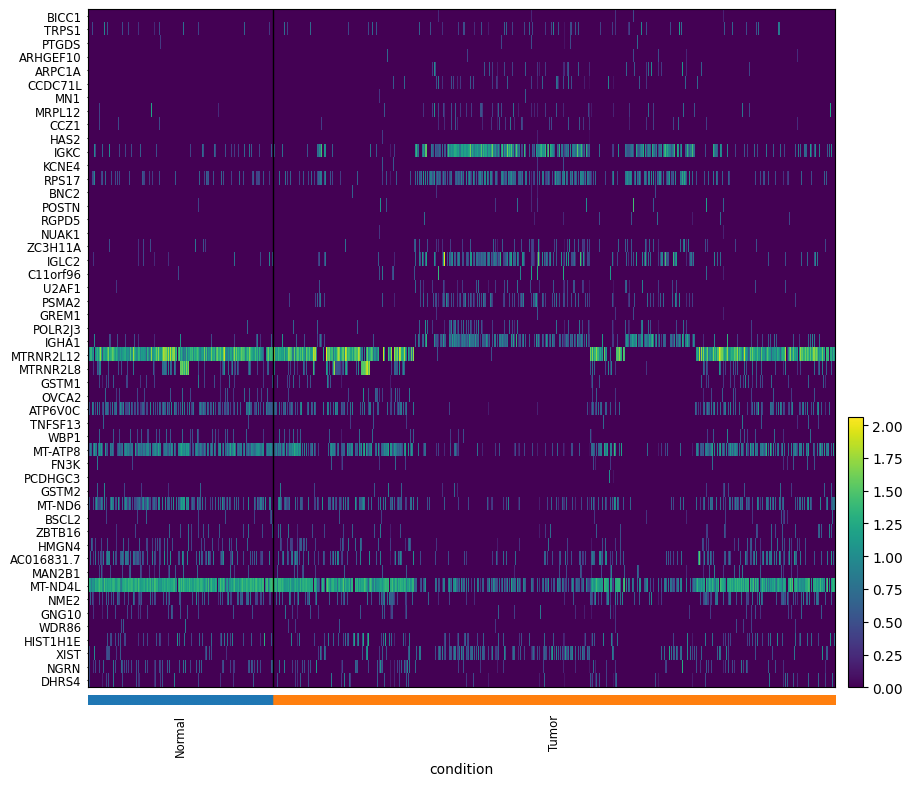

In [16]:
sc.pl.heatmap(adata, genes_to_show, groupby='condition', swap_axes=True,
              log = True)

In [17]:
adata.layers

Layers with keys: counts